# **Neural networks from scratch**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial
from sklearn.model_selection import train_test_split

plt.style.use("ggplot")
np.set_printoptions(precision=2, suppress=True)

In [2]:
a0 = 10
a1 = -4
a2 = 0.7
a3 = 1

p = Polynomial([a0, a1, a2, a3])

display(p)

Polynomial([10. , -4. ,  0.7,  1. ], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [3]:
xx = np.linspace(-5, 5, 1000)
s = 12

yy = p(xx) + np.random.normal(0, s, size=xx.shape)

X_train, X_test, y_train, y_test = train_test_split(
    xx, yy, test_size=0.2, random_state=42
)

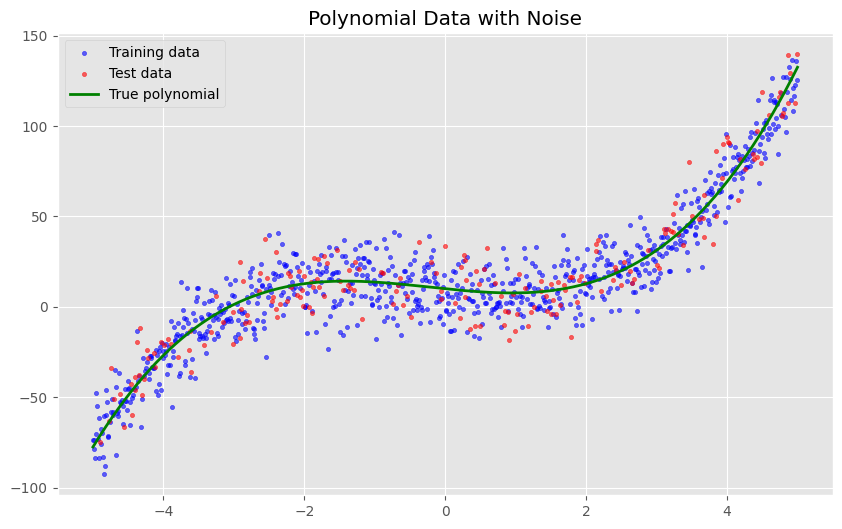

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(
    X_train, y_train, color="blue", label="Training data", alpha=0.6, marker="."
)
plt.scatter(X_test, y_test, color="red", label="Test data", alpha=0.6, marker=".")
plt.plot(xx, p(xx), color="green", label="True polynomial", linewidth=2)
plt.title("Polynomial Data with Noise")
plt.legend()
plt.show()

## **Network Architecture**

We wll be working with the following neural network architecture:

- Input Layer: 1 neurons (a single feature)
- Hidden Layer: 2 neurons (with ReLU activation)
- Output Layer: 1 neuron (for regression output)

<div align="center">
<img src="../images/basic-structure.png" alt="Neural Network Architecture" width="400"/>
<img src="../images/basic-structure-with-activation.png" alt="Neural Network Architecture with Activation" width="460"/>
</div>

The input layer consists of our features:

$$
l_{ij}^{(1)} = x_{ij}^{(1)} \in \mathbb{R}^{n \times 1}, \quad i=1,\ldots,n \text{ (observations)}, \quad j=1 \text{ (features)}
$$

The second layer with 2 neurons computes the weighted sum:

$$
z_{ij}^{(2)} = z_{ik}^{(1)} w_{kj}^{(2)} + b_j^{(2)}, \quad k=1, \quad j=1,2
$$

$$
z_{ij}^{(2)} = z_{i1}^{(1)} w_{1j}^{(2)} + b_j^{(2)} \longrightarrow l_{ij}^{(2)} = \xi(l_{i1}^{(1)} w_{1j}^{(2)} + b_j^{(2)}) \in \mathbb{R}^{n \times 2}, \quad j=1,2
$$

The output layer with a single neuron (and no activation) computes:

$$
z_{ij}^{(3)} =  z_{ik}^{(2)} w_{kj}^{(3)} + b_{j}^{(3)}, \quad k=1,2
$$

$$
z_{ij}^{(3)} = z_{i1}^{(2)} w_{1j}^{(3)} + z_{i2}^{(2)} w_{2j}^{(3)} + b_{j}^{(3)} \in \mathbb{R}^{n \times 1}, \quad j=1
$$


l1 shape: (1000, 1)
l2 shape: (1000, 2)
l3 shape: (1000, 1)


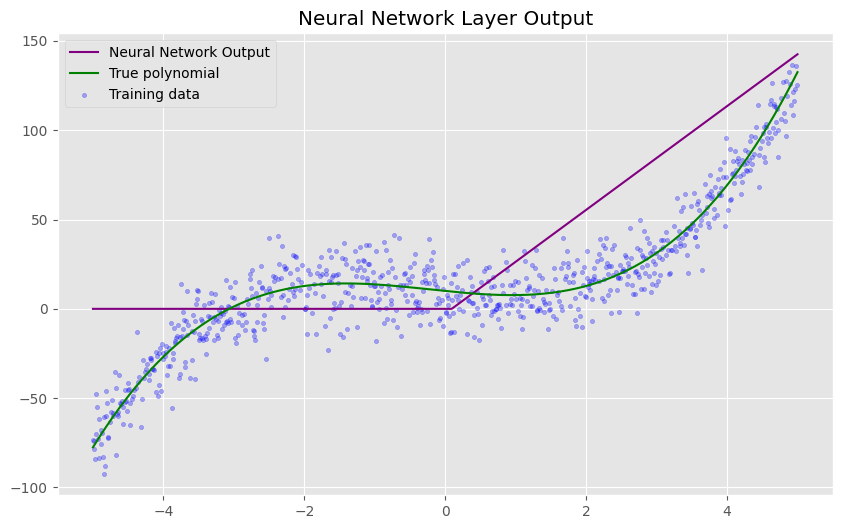

In [5]:
np.random.seed(0)


def relu(x):
    return np.maximum(0, x)


# frst layer
l1 = xx.reshape(-1, 1)

# second layer
w2 = 10 * np.random.normal(0, 1, size=(1, 2))
b2 = 10 * np.random.normal(0, 1, size=(2,))
l2 = relu(l1 @ w2 + b2)

# third layer
w3 = np.random.normal(0, 1, size=(2, 1))
b3 = np.random.normal(0, 1, size=(1,))
l3 = relu(l2 @ w3 + b3)  # this is the output of the network

print("l1 shape:", l1.shape)
print("l2 shape:", l2.shape)
print("l3 shape:", l3.shape)

plt.figure(figsize=(10, 6))
plt.plot(xx, l3, color="purple", label="Neural Network Output")
plt.plot(xx, p(xx), color="green", label="True polynomial")
plt.scatter(
    X_train, y_train, color="blue", label="Training data", alpha=0.3, marker="."
)
plt.title("Neural Network Layer Output")
plt.legend()
plt.show()

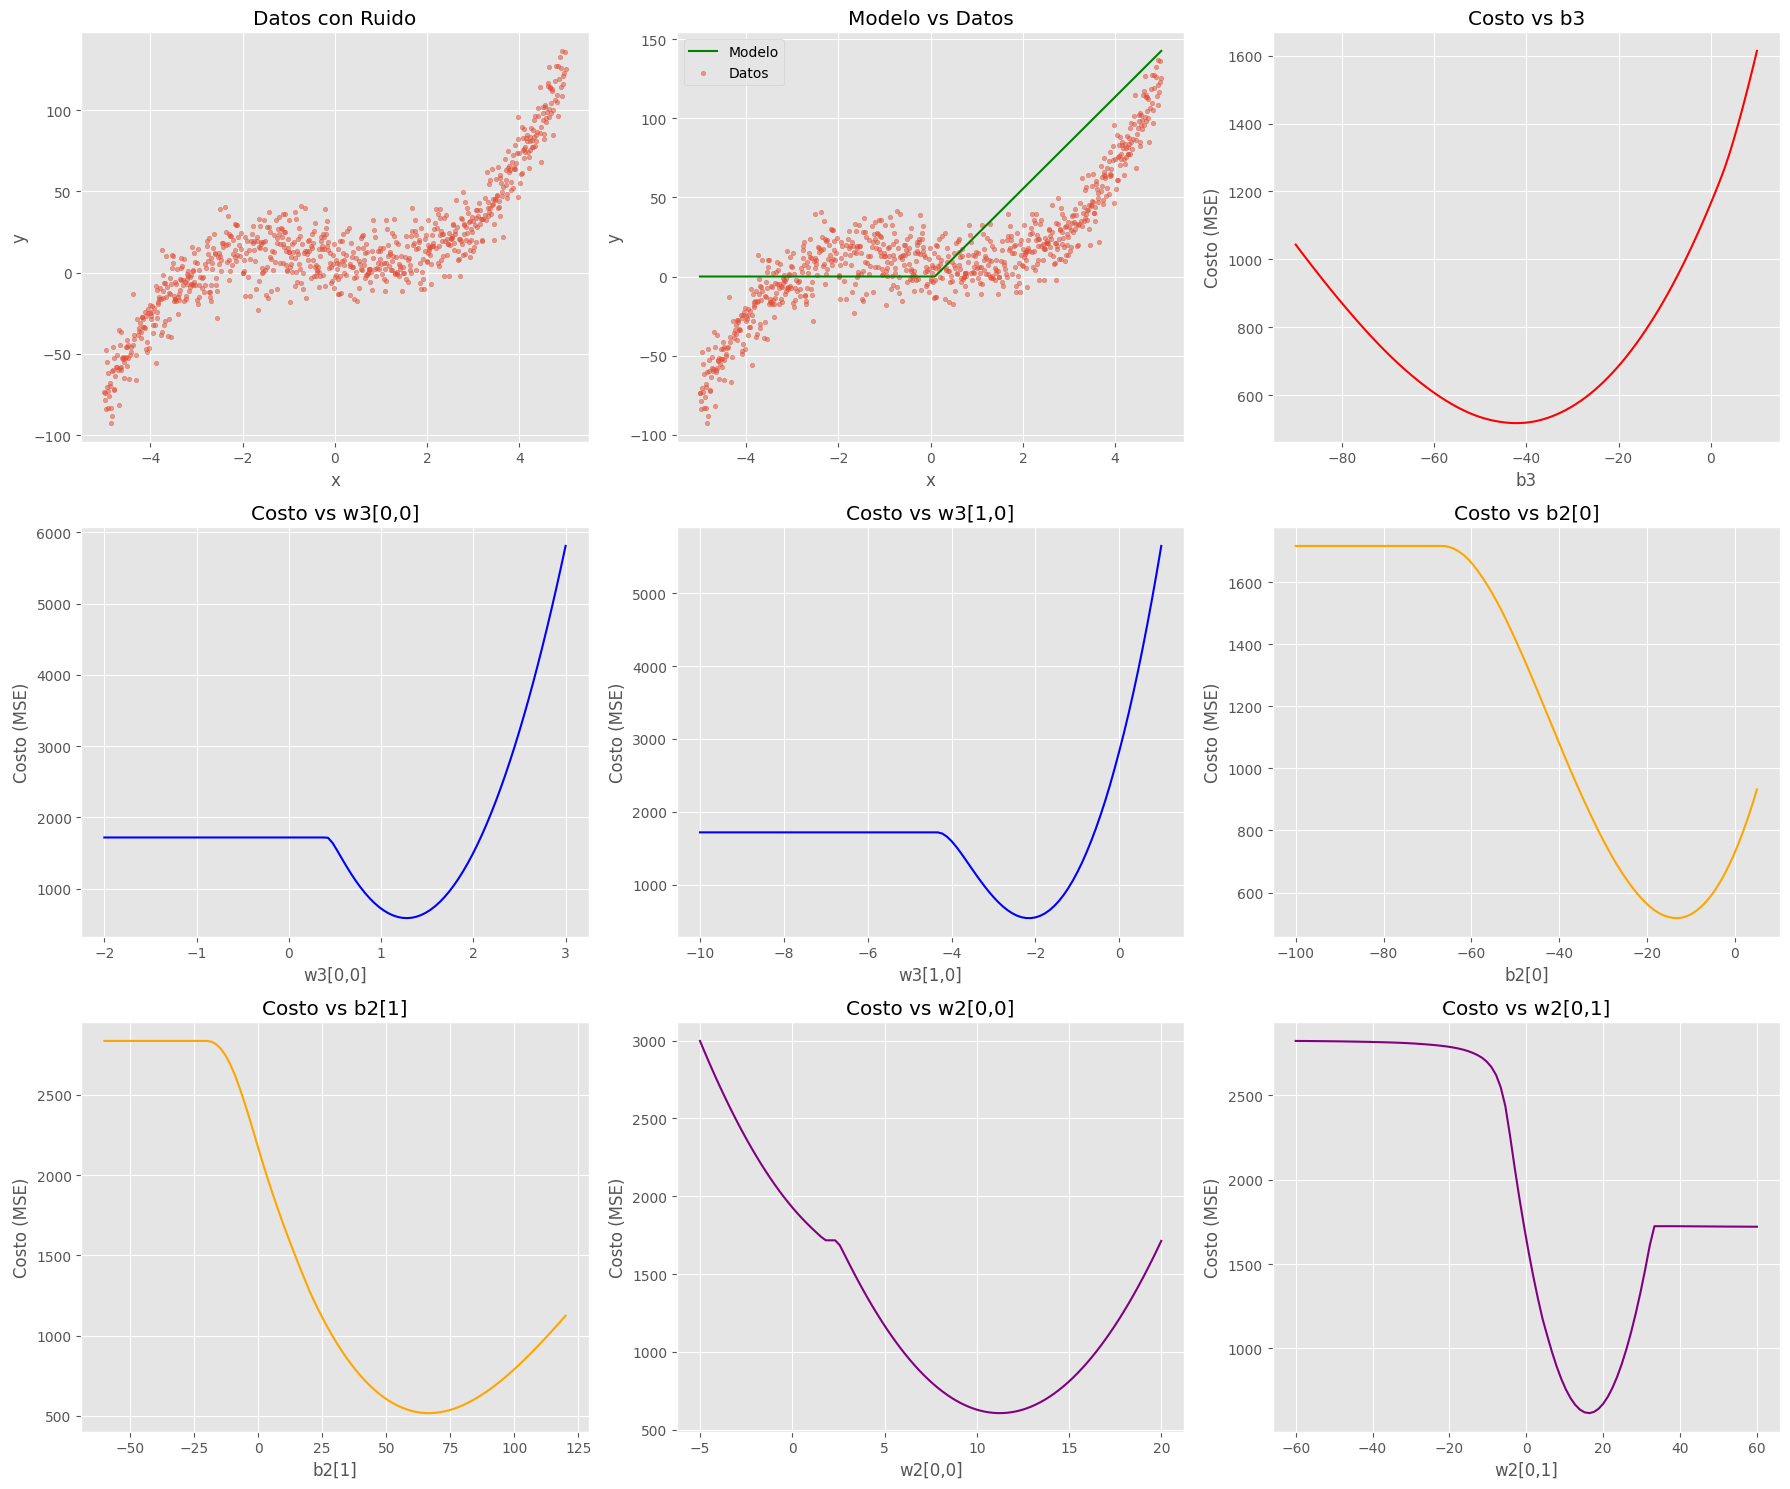

In [30]:
def cost(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# 1. Data
axes[0, 0].scatter(X_train, y_train, alpha=0.5, s=10, label="Datos")
axes[0, 0].set_title("Datos con Ruido")
axes[0, 0].set_xlabel("x")
axes[0, 0].set_ylabel("y")

# 2. Model vs Data
axes[0, 1].plot(xx, l3, color="green", label="Modelo")
axes[0, 1].scatter(X_train, y_train, alpha=0.5, s=10, label="Datos")
axes[0, 1].set_title("Modelo vs Datos")
axes[0, 1].set_xlabel("x")
axes[0, 1].set_ylabel("y")
axes[0, 1].legend()

l1_train = X_train.reshape(-1, 1)
# Precompute l2 for w3/b3 plots where w2/b2 are fixed
l2_train = relu(l1_train @ w2 + b2)

# 3. Cost vs b3
b3_vals = np.linspace(-90, 10, 100)
costs = []
for val in b3_vals:
    # b3 is shape (1,)
    pred = relu(l2_train @ w3 + val).flatten()
    costs.append(cost(y_train, pred))
axes[0, 2].plot(b3_vals, costs, color="red")
axes[0, 2].set_title("Costo vs b3")
axes[0, 2].set_xlabel("b3")
axes[0, 2].set_ylabel("Costo (MSE)")

# 4. Cost vs w3[0, 0]
w3_00_vals = np.linspace(-2, 3, 100)
costs = []
for val in w3_00_vals:
    w3_temp = w3.copy()
    w3_temp[0, 0] = val
    pred = relu(l2_train @ w3_temp + b3).flatten()
    costs.append(cost(y_train, pred))
axes[1, 0].plot(w3_00_vals, costs, color="blue")
axes[1, 0].set_title("Costo vs w3[0,0]")
axes[1, 0].set_xlabel("w3[0,0]")
axes[1, 0].set_ylabel("Costo (MSE)")

# 5. Cost vs w3[1, 0]
w3_10_vals = np.linspace(-10, 1, 100)
costs = []
for val in w3_10_vals:
    w3_temp = w3.copy()
    w3_temp[1, 0] = val
    pred = relu(l2_train @ w3_temp + b3).flatten()
    costs.append(cost(y_train, pred))
axes[1, 1].plot(w3_10_vals, costs, color="blue")
axes[1, 1].set_title("Costo vs w3[1,0]")
axes[1, 1].set_xlabel("w3[1,0]")
axes[1, 1].set_ylabel("Costo (MSE)")

# For w2 and b2, we need to recompute l2_train inside the loop

# 6. Cost vs b2[0]
b2_0_vals = np.linspace(-100, 5, 100)
costs = []
for val in b2_0_vals:
    b2_temp = b2.copy()
    b2_temp[0] = val
    l2_temp = relu(l1_train @ w2 + b2_temp)
    pred = relu(l2_temp @ w3 + b3).flatten()
    costs.append(cost(y_train, pred))
axes[1, 2].plot(b2_0_vals, costs, color="orange")
axes[1, 2].set_title("Costo vs b2[0]")
axes[1, 2].set_xlabel("b2[0]")
axes[1, 2].set_ylabel("Costo (MSE)")

# 7. Cost vs b2[1]
b2_1_vals = np.linspace(-60, 120, 100)
costs = []
for val in b2_1_vals:
    b2_temp = b2.copy()
    b2_temp[1] = val
    l2_temp = relu(l1_train @ w2 + b2_temp)
    pred = relu(l2_temp @ w3 + b3).flatten()
    costs.append(cost(y_train, pred))
axes[2, 0].plot(b2_1_vals, costs, color="orange")
axes[2, 0].set_title("Costo vs b2[1]")
axes[2, 0].set_xlabel("b2[1]")
axes[2, 0].set_ylabel("Costo (MSE)")

# 8. Cost vs w2[0, 0]
w2_00_vals = np.linspace(-5, 20, 100)
costs = []
for val in w2_00_vals:
    w2_temp = w2.copy()
    w2_temp[0, 0] = val
    l2_temp = relu(l1_train @ w2_temp + b2)
    pred = relu(l2_temp @ w3 + b3).flatten()
    costs.append(cost(y_train, pred))
axes[2, 1].plot(w2_00_vals, costs, color="purple")
axes[2, 1].set_title("Costo vs w2[0,0]")
axes[2, 1].set_xlabel("w2[0,0]")
axes[2, 1].set_ylabel("Costo (MSE)")

# 9. Cost vs w2[0, 1]
w2_01_vals = np.linspace(-60, 60, 100)
costs = []
for val in w2_01_vals:
    w2_temp = w2.copy()
    w2_temp[0, 1] = val
    l2_temp = relu(l1_train @ w2_temp + b2)
    pred = relu(l2_temp @ w3 + b3).flatten()
    costs.append(cost(y_train, pred))
axes[2, 2].plot(w2_01_vals, costs, color="purple")
axes[2, 2].set_title("Costo vs w2[0,1]")
axes[2, 2].set_xlabel("w2[0,1]")
axes[2, 2].set_ylabel("Costo (MSE)")

plt.tight_layout()
plt.show()